# Red wine quality prediction

Use RandomForest and XGBoost

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Load the data

In [2]:
data = pd.read_csv('./data/winequality-red.csv')

## Pre-process the data

1. Check missing data - none
2. Drop the irrelevant columns - unecessary in this case
3. Ensure data types are correct
3. Encode the categorical columns
4. Normalize the continuous columns
5. Put back the categorical and continuous columns together
6. Split the data into a training set and a validation set

In [3]:
# only continuous columns exist
X_all = data.drop('quality', axis = 1).values
X_all = (X_all - X_all.mean()) / X_all.std()
y_all = data['quality'].values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 0)

## Random Forest Training

MSE = 0.44185110883657464


Text(0.6, 0.1, 'Pearson corr = 0.671721')

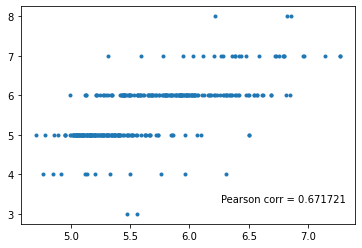

In [4]:
# n_estimators - number of trees in the forest
reg = RandomForestRegressor(n_estimators = 200, random_state = 0)
reg.fit(X_train, y_train)
print("MSE = {}".format(reg.score(X_test, y_test)))
y_val = reg.predict(X_test)

fig, ax = plt.subplots()
ax.plot(y_val, y_test, '.')
corr = np.corrcoef(y_val, y_test)[0,1]
ax.text(0.6,0.1,f'Pearson corr = {corr:.6f}',transform = ax.transAxes)

## Impurity-based importance

Text(0, 0.5, 'Mean decrease in impurity')

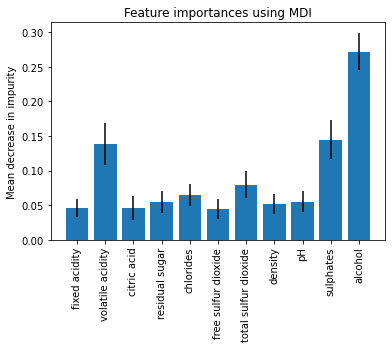

In [5]:
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)

fig, ax = plt.subplots()
ax.bar(range(X_train.shape[1]), importances, yerr=std)
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(data.drop('quality', axis = 1).columns, rotation = 90)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Permutation-based Importance

Text(0, 0.5, 'Mean decrease in score')

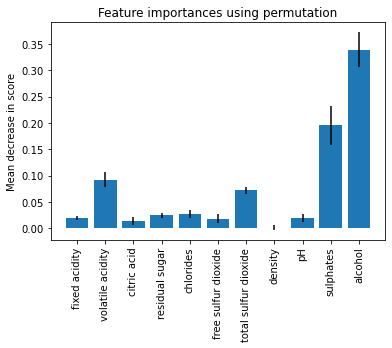

In [6]:
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

fig, ax = plt.subplots()
ax.bar(range(X_train.shape[1]), result.importances_mean, yerr=result.importances_std)
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(data.drop('quality', axis = 1).columns, rotation = 90)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean decrease in score")

## XGBoost training

Text(0.6, 0.1, 'Pearson corr = 0.665154')

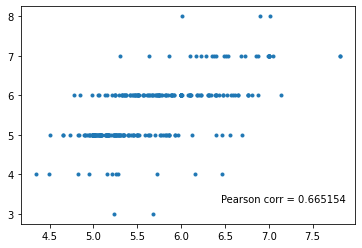

In [7]:
# n_estimators - number of trees in the forest
# max_depth - maximum depth of each regression tree
# eta - learning rate
# subsample - fraction of samples to be used for fitting each tree
# colsample_bytree - fraction of features to be used for each tree
reg = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.6, colsample_bytree=0.5)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)
y_val = reg.predict(X_test)

fig, ax = plt.subplots()
ax.plot(y_val, y_test, '.')
corr = np.corrcoef(y_val, y_test)[0,1]
ax.text(0.6,0.1,f'Pearson corr = {corr:.6f}',transform = ax.transAxes)

## Gain-based importance

Text(0, 0.5, 'Mean decrease in gain')

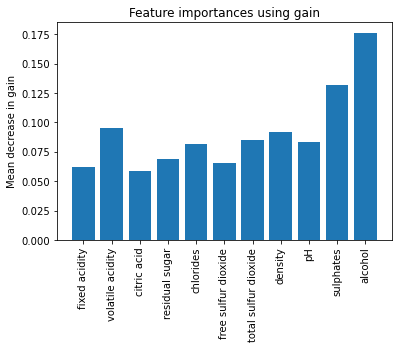

In [8]:
importances = reg.feature_importances_

fig, ax = plt.subplots()
ax.bar(range(X_train.shape[1]), importances)
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(data.drop('quality', axis = 1).columns, rotation = 90)
ax.set_title("Feature importances using gain")
ax.set_ylabel("Mean decrease in gain")

## Permulation-based Importance

Text(0, 0.5, 'Mean decrease in score')

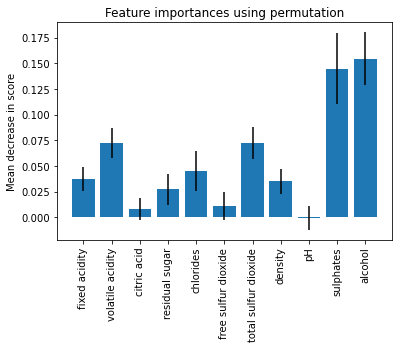

In [9]:
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

fig, ax = plt.subplots()
ax.bar(range(X_train.shape[1]), result.importances_mean, yerr=result.importances_std)
ax.set_xticks(range(X_train.shape[1]))
ax.set_xticklabels(data.drop('quality', axis = 1).columns, rotation = 90)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean decrease in score")